#  Акции

Работа с ценами на акции: анализ данных, обработка пропусков, анализ доходности и риска, построение графиков

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

В табличке `prices.tsv` лежат данные о том как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по каждой из ценных бумаг.  Подгрузим эти таблицы и посмотрим на них. 

In [2]:
df_prices = pd.read_csv('Прикладная статистика\\Данные\\price.tsv', sep='\t')

# сделали дату индексом таблицы и применили это преобразование
df_prices.set_index('Date', inplace=True)  
df_prices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-02,18.982769,10.030768,51.945328,32.324974,NaN,26.103115,11.17,17.431229,32.489162,29.600000,...,43.086357,28.942909,21.664534,NaN,24.980757,49.945686,27.59,20.329309,NaN,NaN
2010-08-03,18.337280,10.049624,51.148121,32.334858,NaN,25.590956,10.97,17.490696,32.223312,29.120001,...,43.628933,29.177372,21.289482,NaN,24.594522,50.279709,27.40,20.080635,NaN,NaN
2010-08-04,18.633682,9.455699,51.877274,32.464500,NaN,25.915325,10.50,17.553665,32.497211,29.700001,...,43.628933,29.674450,21.488039,NaN,24.808437,50.873531,28.09,20.089518,NaN,NaN
2010-08-05,18.745655,9.088029,52.373096,32.306469,NaN,25.898251,10.26,17.483702,32.199158,29.440001,...,43.621983,29.590042,21.267420,NaN,25.200619,50.567337,30.35,19.636568,NaN,NaN
2010-08-06,18.923494,8.946616,51.284237,32.107712,NaN,25.812889,9.98,17.690086,32.440819,29.230000,...,43.107220,29.599421,21.157112,NaN,25.170906,50.084862,30.24,19.227848,NaN,NaN


In [3]:
df_inf = pd.read_csv('Прикладная статистика\\Данные\\information.tsv', sep='\t')
df_inf.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? Запишите результат в пременную `n_nasdaq`.

In [4]:
n_nasdaq = df_inf['NASDAQ'].sum()

In [5]:
n_nasdaq = df_inf['NASDAQ'].sum() # каждое True это 1, а False 0
n_nasdaq

103

__а)__ Сколько ценных бумаг входят во все три индекса сразу?

In [9]:
n_sp = sum(df_inf[['S&P-500', 'NASDAQ', 'DJI']].sum(axis=1) == 3)
n_sp = (df_inf['S&P-500'] &  df_inf['NASDAQ'] &  df_inf['DJI']).sum()

__б)__ В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [11]:
df_sp = df_inf[df_inf['S&P-500']]
n_founded = sum((df_sp['Founded'] < 1900) & (df_sp['Founded'] >= 1800))

__в)__  В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных? Все пропуски в этой колонке удалите методом `.dropna()`. 

In [14]:
n_sectors = df_inf['GICS Sector'].dropna().nunique()

__г)__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора? 

In [17]:
sectors = list(df_inf['GICS Sector'].value_counts().index[:3])

In [18]:
df_sp = df_inf[df_inf['S&P-500']]
n_top3 = df_sp['GICS Sector'].apply(lambda w: w in sectors).sum()

__д)__ У скольки компаний тикер (краткое название из колонки `Symbol`) состоит из трёх букв? 

In [21]:
df_inf['Symbol'].str.len()

0      1
1      3
2      3
3      4
4      4
      ..
520    3
521    4
522    4
523    2
524    3
Name: Symbol, Length: 525, dtype: int64

In [22]:
n_ticker = sum(df_inf['Symbol'].str.len() == 3)

А из другого количества букв? Заведите колонку `letter_count` с числом букв в тикере, а после подсчитайте как часто в ней встречаются разные значения. 

In [25]:
df_inf['letter_count'] = df_inf['Symbol'].str.len()
df_inf['letter_count'].value_counts()

letter_count
3    308
4    148
2     52
1     10
5      7
Name: count, dtype: int64

Создайте в таблице новую колонку `first_letter`. Запишите туда первую букву каждого тикера из колонки `Symbol`. Какая буква встречается на первом месте чаще всего? 

In [27]:
df_inf['first_letter'] = df_inf['Symbol'].str[0]
popular_letter = df_inf['first_letter'].value_counts().index[0]

__е)__ Теперь поработаем со стоимостью акций. 

- Из таблицы `df_inf` возьмите колонку `Symbol` и сохраните значения из неё, `.values`, в вектор tickers
- Выберите из вектора 10 случайных тикеров командой `np.random.choice`, опцию `replace` установить в `False`, нам нужна выборка без повторений

In [29]:
tickers = df_inf['Symbol'].values
tickers10 = np.random.choice(tickers, 10, replace=False)

In [30]:
tickers10

array(['AME', 'VRTX', 'FFIV', 'PFE', 'FANG', 'HD', 'NWSA', 'EBAY', 'AEE',
       'ES'], dtype=object)

Методом `.plot` постройте для выбранных 10 тикеров картинку с динамикой их цен. В скобках у `.plot()` допишите `figsize=(12,7)`, чтобы отрегулировать размер картинки.

In [33]:
df_prices

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-02,18.982769,10.030768,51.945328,32.324974,NaN,26.103115,11.170000,17.431229,32.489162,29.600000,...,43.086357,28.942909,21.664534,NaN,24.980757,49.945686,27.590000,20.329309,NaN,NaN
2010-08-03,18.337280,10.049624,51.148121,32.334858,NaN,25.590956,10.970000,17.490696,32.223312,29.120001,...,43.628933,29.177372,21.289482,NaN,24.594522,50.279709,27.400000,20.080635,NaN,NaN
2010-08-04,18.633682,9.455699,51.877274,32.464500,NaN,25.915325,10.500000,17.553665,32.497211,29.700001,...,43.628933,29.674450,21.488039,NaN,24.808437,50.873531,28.090000,20.089518,NaN,NaN
2010-08-05,18.745655,9.088029,52.373096,32.306469,NaN,25.898251,10.260000,17.483702,32.199158,29.440001,...,43.621983,29.590042,21.267420,NaN,25.200619,50.567337,30.350000,19.636568,NaN,NaN
2010-08-06,18.923494,8.946616,51.284237,32.107712,NaN,25.812889,9.980000,17.690086,32.440819,29.230000,...,43.107220,29.599421,21.157112,NaN,25.170906,50.084862,30.240000,19.227848,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,97.269997,11.390000,146.830002,378.557434,97.160004,103.574806,298.609985,99.989998,223.320007,437.100006,...,43.217411,43.450001,15.820000,75.260002,93.370003,134.240005,273.339996,32.098629,252.330002,146.919998
2020-07-28,95.300003,11.770000,146.190002,372.338684,96.709999,101.692535,294.890015,99.860001,222.179993,432.260010,...,42.707470,43.500000,15.210000,74.339996,92.750000,134.160004,271.179993,31.950068,252.179993,145.979996
2020-07-29,97.099998,11.400000,148.210007,379.475800,97.010002,102.887627,299.100006,102.519997,224.380005,436.299988,...,43.178185,44.790001,15.860000,77.169998,94.830002,139.580002,273.850006,33.049404,252.389999,147.589996


<AxesSubplot:xlabel='Date'>

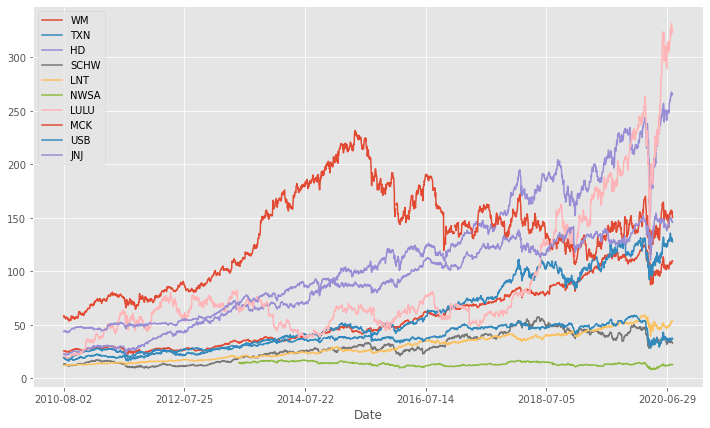

In [34]:
df_prices[tickers10].plot(figsize = (12,7))

Методом `.hist()` постройте для этих цен гистограммы. Отнормируйте высоту столбиков так, чтобы сумма площадей под ними была равна единице. 

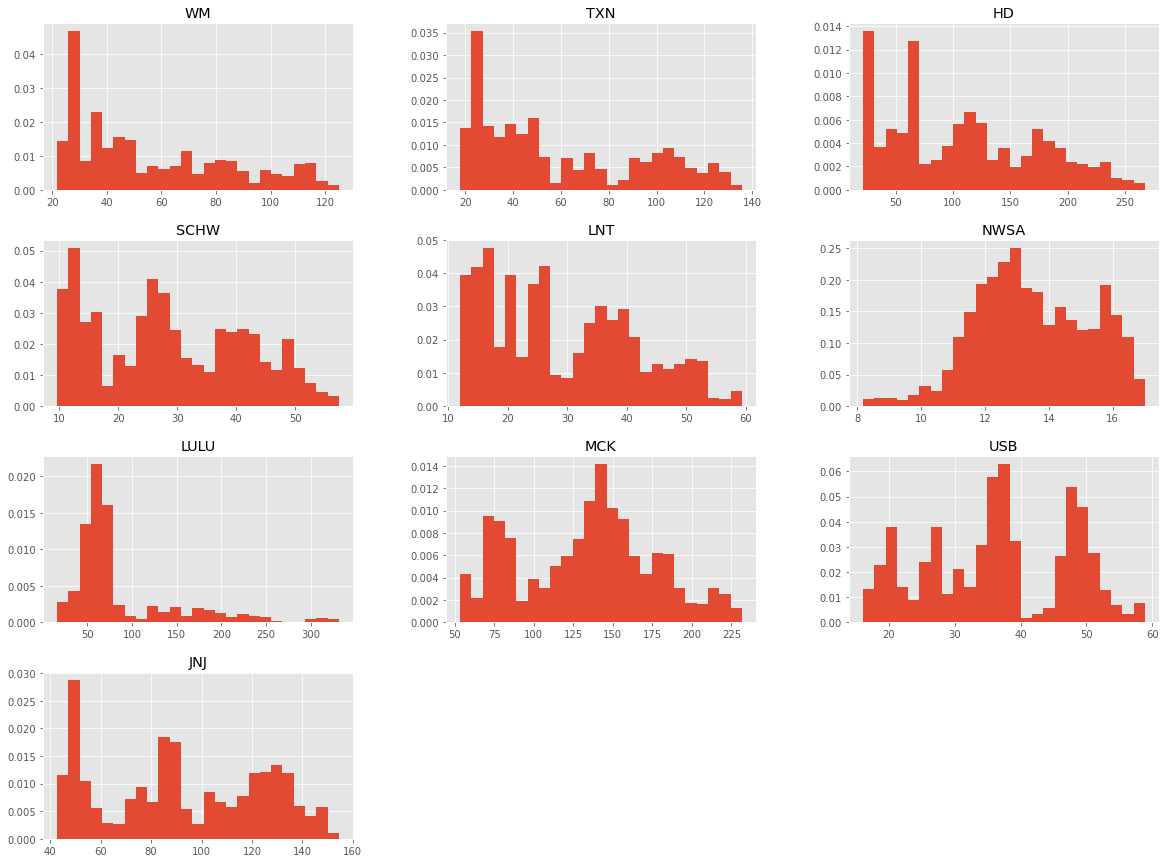

In [36]:
df_prices[tickers10].hist(bins = 25, density = True, figsize =(20,15));

Финансовые продукты характеризуются двумя основными характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [39]:
df_r = df_prices.diff()/df_prices.shift(1)
df_r = df_r[1:]
df_r.head()


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-03,-0.034004,0.001880,-0.015347,0.000306,NaN,-0.019621,-0.017905,0.003412,-0.008183,-0.016216,...,0.012593,0.008101,-0.017312,NaN,-0.015461,0.006688,-0.006887,-0.012232,NaN,NaN
2010-08-04,0.016164,-0.059099,0.014256,0.004009,NaN,0.012675,-0.042844,0.003600,0.008500,0.019918,...,0.000000,0.017036,0.009327,NaN,0.008698,0.011810,0.025183,0.000442,NaN,NaN
2010-08-05,0.006009,-0.038883,0.009558,-0.004868,NaN,-0.000659,-0.022857,-0.003986,-0.009172,-0.008754,...,-0.000159,-0.002844,-0.010267,NaN,0.015808,-0.006019,0.080456,-0.022547,NaN,NaN
2010-08-06,0.009487,-0.015560,-0.020790,-0.006152,NaN,-0.003296,-0.027291,0.011804,0.007505,-0.007133,...,-0.011801,0.000317,-0.005187,NaN,-0.001179,-0.009541,-0.003624,-0.020814,NaN,NaN
2010-08-09,0.037940,0.025290,0.009668,0.006382,NaN,-0.006283,0.025050,0.006130,0.007450,0.009921,...,0.007746,0.006654,0.016684,NaN,0.007790,0.000186,0.006614,0.009242,NaN,NaN


Постройте для выбранных ранее 10  случайных тикеров картинку с динамикой доходностей. 

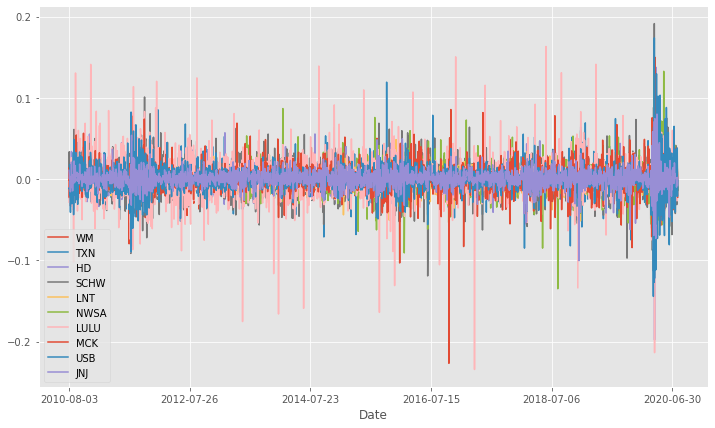

In [41]:
df_r[tickers10].plot(figsize = (12,7));

Постройте для доходностей этих десяти тикеров гистограммы. 

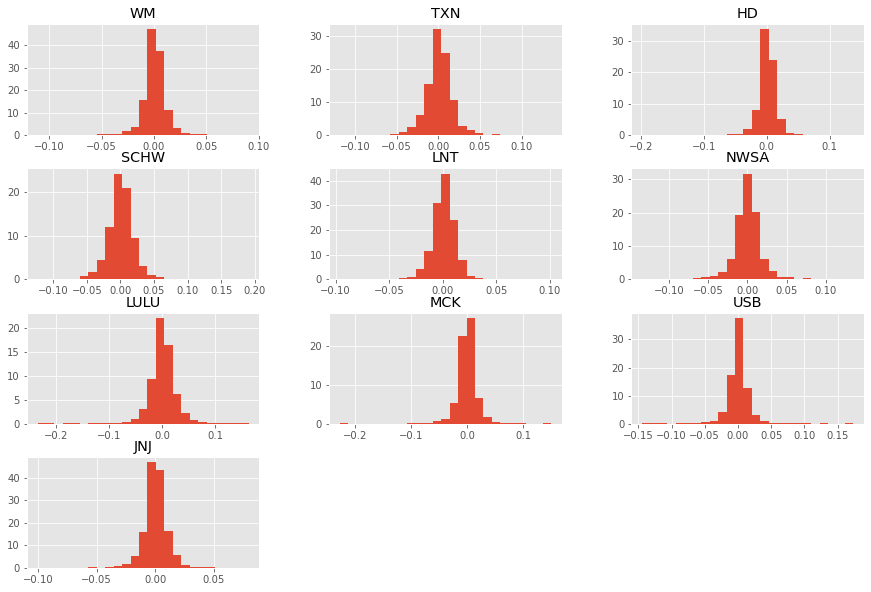

In [42]:
df_r[tickers10].hist(bins = 25, density=True, figsize=(15,10));

Постройте для доходностей этих 10 бумаг ящики с усами.

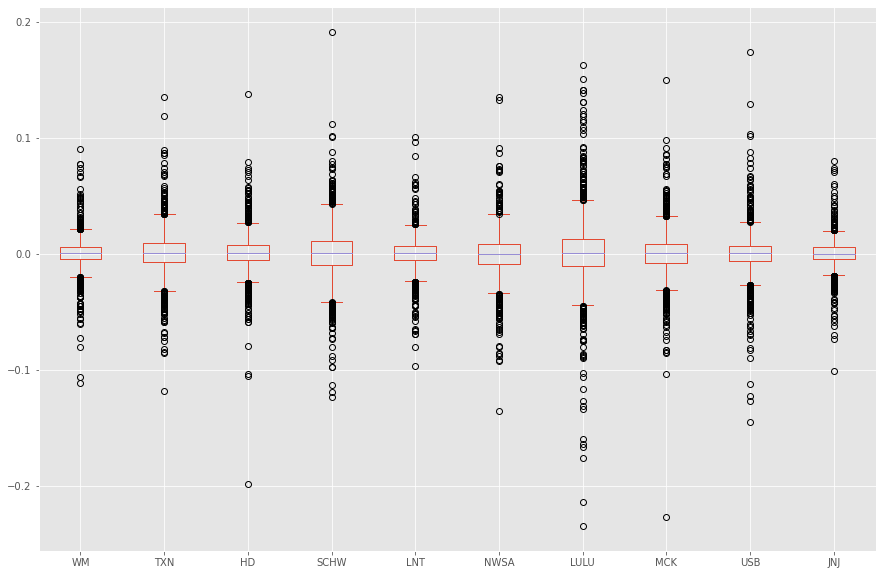

In [44]:
df_r[tickers10].plot(kind='box', figsize=(15,10));

__Выводы:__ 

Доходности по нашим акциям имеют распределение похожее на нормальное, но есть отличие. По ящикам с усами видно, что в данных есть довольно большое количество выбросов. Это сигнализирует о том, что у распределения доходностей хвосты оказываются более тяжёлыми, чем у нормального распределения. То есть под ними сосредоточено больше вероятностной массы и из-за этого редкое события более вероятны, чем для нормального распределения. Такую особенность финансовых данных мы более подробно будем обсуждать в будущем. 

Кроме того, по построенным визуализациям видно, что средние доходности практически для всех ценных бумаг находится близко к нулю.

__ё)__  Посчитайте для всех компаний среднюю доходность. Найдите 10 самых доходных компаний и 10 самых убыточных. 

In [45]:
R = df_r.mean().sort_values(ascending=False)
rtop_10 = R.index[:10].sort_values()
rbottom_10 = R[-10:].index.sort_values()

__ж)__ Мы поговорили о доходности. Теперь поговорим о риске. Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. 

Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых. 

In [46]:
STD = df_r.std().sort_values(ascending=False)
stdtop_10 = STD[:10].index.sort_values()    
stdbottom_10 = STD[-10:].index.sort_values() 

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Построим для наших ценных бумаг диаграмму рассеивания, на которой будет видно где по своей доходности и риску находится какая ценная бумага.  

In [49]:
# таблица с доходностями и риском
data = pd.DataFrame({'std': STD, 'r': R})

# добавили сектора экономики для каждой из ценных бумаг
data = data.join(df_inf.set_index('Symbol')['GICS Sector'])
data.fillna('another sector')
data.head()

,std,r,GICS Sector
A,0.018245,0.000808,Health Care
AAL,0.032635,0.000549,Industrials
AAP,0.020001,0.000585,Consumer Discretionary
AAPL,0.017418,0.001179,Information Technology
ABBV,0.018026,0.000873,Health Care


C:\Users\ksenkys\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ksenkys\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ksenkys\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ksenkys\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

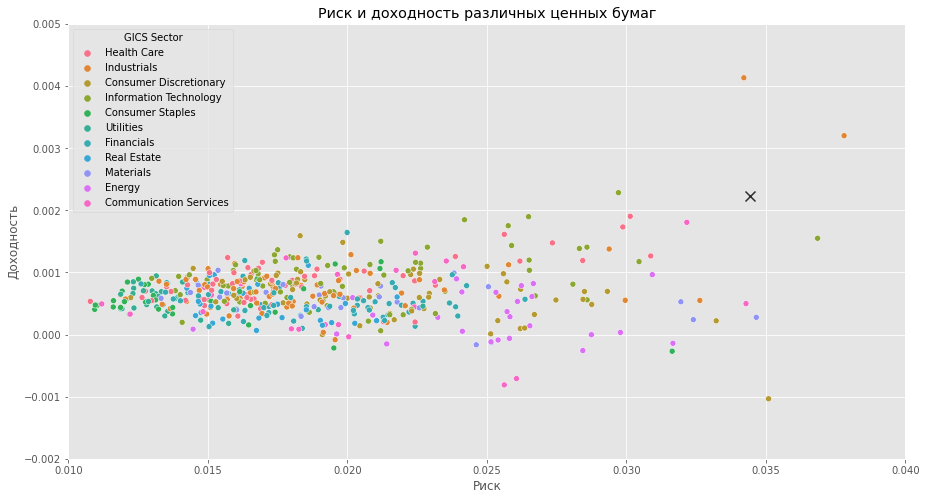

In [50]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=data, x='std', y='r', hue='GICS Sector')

tsla = data.loc['TSLA']
sns.regplot([tsla['std']], [tsla['r']], scatter=True, fit_reg=False, 
            marker='x', color='black', scatter_kws={'s':100}) 

plt.ylim(-0.002, 0.005)
plt.xlim(0.01, 0.04)

plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Риск и доходность различных ценных бумаг');

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ Чёрным крестиком отдельно отмечена Тесла, которая обладает довольно высокими доходностью и риском.


Сделайте группировку (`groupby`) для таблицы `data` по секторам экономики. Какой из секторов экономики обладает самым низким медианным значением риска? 

In [51]:
df_agg = data.groupby('GICS Sector')[['std', 'r']].median()
df_agg

,std,r
GICS Sector,,
Communication Services,0.019866,0.000547
Consumer Discretionary,0.020787,0.000663
Consumer Staples,0.013180,0.000527
Energy,0.025565,0.000282
Financials,0.018323,0.000543
Health Care,0.016737,0.000811
Industrials,0.017356,0.000686
Information Technology,0.019129,0.000905
Materials,0.019193,0.000597


In [52]:
min_sector = df_agg[df_agg['std'] == df_agg['std'].min()].index[0]
max_sector = df_agg[df_agg['r'] == df_agg['r'].max()].index[0]
max_sector

'Information Technology'

__з)__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают VaR. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $VaR$.
Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль на уровне $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ VaR по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Не забудьте умножить результаты на $-1$ перед сортировкой. 

In [55]:
VaR = -1*df_r.quantile(0.05).sort_values(ascending = True)
VaRtop_10 = sorted(VaR[:10].index)
VaRbottom_10 = sorted(VaR[-10:].index)

$VaR$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $VaR$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$?…

__и)__  __Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $VaR$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $ES$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Сколько денег мы заработаем в $5\%$ лучших случаем к концу дня? 

__Важно:__ VaR и Es в этом пункте - отрицательные числа.

In [39]:
var_tsla = df_r['TSLA'].quantile(0.05)   # VaR для Теслы
es_tsla  = df_r['TSLA'][df['TSLA'] < var_tsla].mean()   # ES для теслы 
loss = es_tsla*1000       # Потеря от 1000$
q = df_r['TSLA'].quantile(0.95)
p = df_r['TSLA'][df['TSLA'] > q].mean()
profit = 1000*p     # Заработок от 1000$

## Какая метрика лучше? 

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. 

Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.